Milestone 1: Data Understanding & Exploration
- Load the diabetes dataset using scikit-learn and display the first five rows
- Perform descriptive statistics (mean, median, min, max) and summarize class balance
- Visualize the distributions of at least two features using histograms or box plots

In [46]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [47]:
# Load Diabetes dataset
diabetes = load_diabetes(as_frame=True)
df_diabetes = diabetes.frame

In [48]:
print("\nDiabetes Dataset:")
print(df_diabetes.head())


Diabetes Dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [49]:
print(df_diabetes.describe().T)

        count          mean        std        min        25%         50%  \
age     442.0 -2.511817e-19   0.047619  -0.107226  -0.037299    0.005383   
sex     442.0  1.230790e-17   0.047619  -0.044642  -0.044642   -0.044642   
bmi     442.0 -2.245564e-16   0.047619  -0.090275  -0.034229   -0.007284   
bp      442.0 -4.797570e-17   0.047619  -0.112399  -0.036656   -0.005670   
s1      442.0 -1.381499e-17   0.047619  -0.126781  -0.034248   -0.004321   
s2      442.0  3.918434e-17   0.047619  -0.115613  -0.030358   -0.003819   
s3      442.0 -5.777179e-18   0.047619  -0.102307  -0.035117   -0.006584   
s4      442.0 -9.042540e-18   0.047619  -0.076395  -0.039493   -0.002592   
s5      442.0  9.293722e-17   0.047619  -0.126097  -0.033246   -0.001947   
s6      442.0  1.130318e-17   0.047619  -0.137767  -0.033179   -0.001078   
target  442.0  1.521335e+02  77.093005  25.000000  87.000000  140.500000   

               75%         max  
age       0.038076    0.110727  
sex       0.050680   

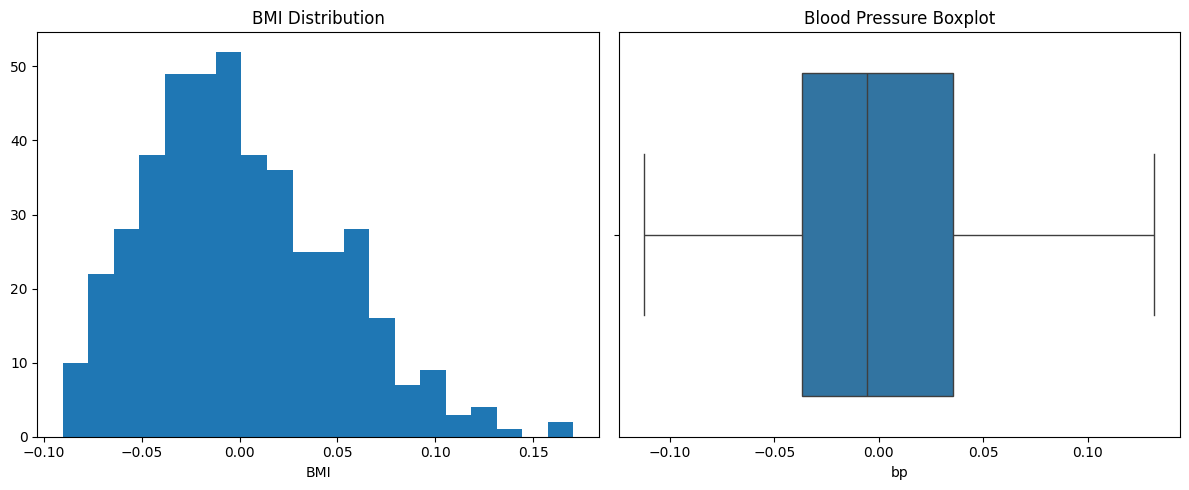

In [50]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df_diabetes['bmi'], bins=20)
plt.title("BMI Distribution")
plt.xlabel("BMI")

plt.subplot(1,2,2)
sns.boxplot(x=df_diabetes['bp'])
plt.title("Blood Pressure Boxplot")

plt.tight_layout()
plt.show()

Milestone 2: Data Preparation & Preprocessing
- Handle any missing values, duplicates, or outliers in the dataset
- Apply feature scaling/normalization
- Encode categorical variables (if present) with a suitable technique
- Perform basic correlation analysis and point out highly correlated features

In [51]:
print("\nMissing Values:")
print(df_diabetes.isnull().sum())

df = df_diabetes.drop_duplicates()


Missing Values:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [52]:
def remove_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return col.clip(lower, upper)

df[df.columns] = df[df.columns].apply(remove_outliers)

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop("target", axis=1))

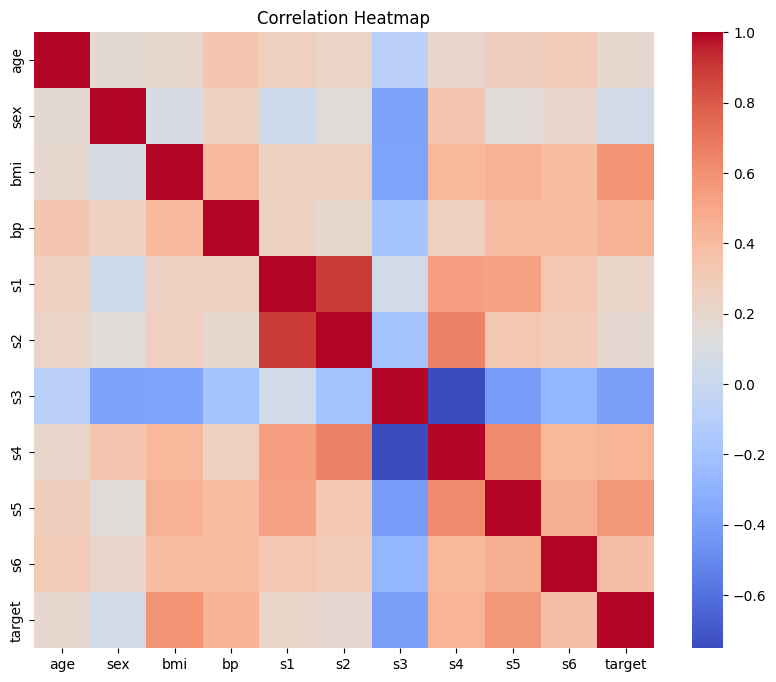


Highly Correlated Features:
target    1.000000
bmi       0.586965
s5        0.566320
bp        0.441482
s4        0.435153
s6        0.380456
s1        0.213454
age       0.187889
s2        0.179048
sex       0.043062
Name: target, dtype: float64


In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

print("\nHighly Correlated Features:")
print(df.corr()['target'].sort_values(ascending=False).head(10))

Milestone 3: Model Selection & Training
- Split the dataset into training and test sets with a suitable ratio
- Choose and train at least two machine learning models (e.g., logistic regression, random forest)
- Include hyperparameter tuning with cross-validation for one chosen model

In [55]:
X = X_scaled
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [57]:
print("\nLinear Regression Coefficients:")
print(lr.coef_)


Linear Regression Coefficients:
[  1.82099858 -11.80465055  25.13447494  16.69238605 -51.66744926
  29.71013642  11.95557935  15.96153644  37.54092731   2.18033832]


In [58]:
accuracy = lr.score(X_test, y_test)
print("\nLinear Regression Accuracy:", accuracy * 100)


Linear Regression Accuracy: 45.15326559080215


In [59]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [60]:
accuracy = rf.score(X_test, y_test)
print("\nRandom Forest Accuracy:", accuracy * 100)


Random Forest Accuracy: 44.29190640570396


In [ ]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [4, 6, 8],
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring="neg_mean_squared_error")
grid.fit(X_train, y_train)

_rf = grid.best_estimator_
print("\nBest Random Forest Model:", _rf)


Best Random Forest Model: RandomForestRegressor(max_depth=8, n_estimators=200, random_state=42)


Milestone 4: Model Evaluation & Interpretation
- Evaluate the trained models with appropriate metrics (accuracy, ROC-AUC, precision, recall)
- Plot and interpret a confusion matrix for the best model

In [62]:
models = {
    "Linear Regression": lr,
    "Random Forest": _rf
}

for name, model in models.items():
    preds = model.predict(X_test)
    print(f"\n{name} Results:")
    print("MAE:", mean_absolute_error(y_test, preds))
    print("MSE:", mean_squared_error(y_test, preds))
    print("R2 Score:", r2_score(y_test, preds))


Linear Regression Results:
MAE: 42.6119003857969
MSE: 2905.8632181051726
R2 Score: 0.4515326559080215

Random Forest Results:
MAE: 44.058723608432295
MSE: 2952.6960559727427
R2 Score: 0.4426931888465726


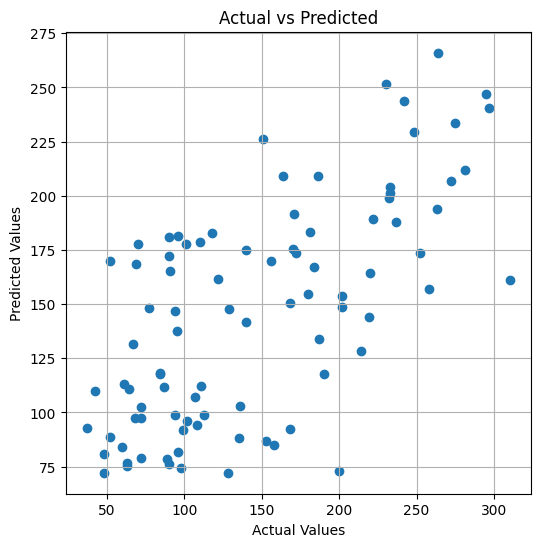

In [63]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, _rf.predict(X_test))
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid()
plt.show()

Milestone 5: Deployment & Reporting
- save your final trained model for later use
- load the model and making a new prediction

In [64]:
joblib.dump(_rf, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model Saved Successfully!")

Model Saved Successfully!


In [ ]:
model_loaded = joblib.load("diabetes_model.pkl")
scaler_loaded = joblib.load("scaler.pkl")

sample = df.drop("target", axis=1).iloc[0].values.reshape(1,-1)

sample_scaled = scaler_loaded.transform(sample)

prediction = model_loaded.predict(sample_scaled)
print("\nNew Prediction:", prediction)



New Prediction: [226.08240115]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
